<a href="https://colab.research.google.com/github/ioskn/mldl_htwg/blob/master/eda/Explorative%20Analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Beispiel für eine explorative Datenanalyse: Erdbeben der letzten 7 Tage (US Geological Survey)
==============================================================================================


## Einbinden von packages
Import zweier Standardpakete für die Datenanalyse: Numpy für mehrdimensionale Arrays, Pandas für Datenanalyse in Tabellen.

In [3]:
import pandas as pd
import numpy as np

np.__version__, pd.__version__

('1.18.5', '1.1.2')

## Einlesen der Data

Idealerweise sind die noteboks standalone. Im ersten Schritt werden die Daten eingelesen.

#### Direkter Download
Direkter Download vom USGS, Abruf des Downloaddatums, automatischer Import in Pandas-Dataframe. 

In [4]:
fileUrl = 'http://earthquake.usgs.gov/earthquakes/catalogs/eqs7day-M1.txt' #410 Error
fileUrl = 'http://www-home.htwg-konstanz.de/~oduerr/data/eqs7day-M1.txt'
eData = pd.read_csv(fileUrl)
dateDownloaded = !date #Calling Linux
dateDownloaded

['Mon Oct  5 18:03:14 UTC 2020']

#### Caching

Bei grösseren Datein empfiehlt sich ein cacheing der Daten. 

In [5]:
import os
if not os.path.isfile('eqs7day-M1.txt'):
    !pip install wget #Installation of wget
    import wget
    print("Downloading file...\n")
    wget.download('http://www-home.htwg-konstanz.de/~oduerr/data/eqs7day-M1.txt', 'eqs7day-M1.txt')
else:
    print("File exists\n")
!ls -11

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=18896be4915dc1563f184e8b39eece4951a17c3989193e5f41f44c04553ace3b
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget

eqs7day-M1.txt
sample_data


### Darstellung als Pandas-DataFrame
-----------------------------------

Darstellung des Datensatzes als Datensatzes als Pandas-Dataframe (Tabelle der ersten und letzten 30 Einträge, Anzahl Reihen und Spalten). Konvention: Variablen sind die Spalten, einzelne Messungen die Zeilen.

In [6]:
eData

,Src,Eqid,Version,Datetime,Lat,Lon,Magnitude,Depth,NST,Region
0,ci,14988836,0,"Saturday, May 21, 2011 09:06:50 UTC",33.9665,-116.5598,1.4,9.3,54,Southern California
1,ak,10237914,2,"Saturday, May 21, 2011 08:33:21 UTC",65.3689,-166.8913,5.2,19.2,22,northern Alaska
2,ak,10237907,2,"Saturday, May 21, 2011 07:42:46 UTC",58.1643,-151.4626,3.3,32.9,54,"Kodiak Island region, Alaska"
3,ci,14988828,0,"Saturday, May 21, 2011 07:31:41 UTC",33.1555,-116.1015,1.5,9.7,82,Southern California
4,nc,71573030,0,"Saturday, May 21, 2011 07:21:41 UTC",36.7657,-121.3738,1.2,4.9,11,Central California
...,...,...,...,...,...,...,...,...,...,...
906,ci,14985188,2,"Saturday, May 14, 2011 10:10:13 UTC",32.6497,-115.7418,1.2,5.3,13,Southern California
907,uu,05141006,2,"Saturday, May 14, 2011 10:06:37 UTC",44.7355,-111.2197,2.0,5.9,19,western Montana
908,pr,11134002,0,"Saturday, May 14, 2011 10:05:46 UTC",18.3500,-68.9359,3.5,100.0,5,Dominican Republic region
909,uu,05140948,2,"Saturday, May 14, 2011 09:48:13 UTC",44.7340,-111.2188,1.3,5.6,18,western Montana


Kürzere Darstellung mit head(): nur die ersten 5 Einträge des Tabellenkopfes

In [7]:
eData.head()

,Src,Eqid,Version,Datetime,Lat,Lon,Magnitude,Depth,NST,Region
0,ci,14988836,0,"Saturday, May 21, 2011 09:06:50 UTC",33.9665,-116.5598,1.4,9.3,54,Southern California
1,ak,10237914,2,"Saturday, May 21, 2011 08:33:21 UTC",65.3689,-166.8913,5.2,19.2,22,northern Alaska
2,ak,10237907,2,"Saturday, May 21, 2011 07:42:46 UTC",58.1643,-151.4626,3.3,32.9,54,"Kodiak Island region, Alaska"
3,ci,14988828,0,"Saturday, May 21, 2011 07:31:41 UTC",33.1555,-116.1015,1.5,9.7,82,Southern California
4,nc,71573030,0,"Saturday, May 21, 2011 07:21:41 UTC",36.7657,-121.3738,1.2,4.9,11,Central California


Anzahl der Reihen und Spalten mit Numpy shape().

In [8]:
np.shape(eData)

(911, 10)

Anzeige der einzelnen Spaltennamen mit Attribut DataFrame.columns

In [9]:
eData.columns

Index(['Src', 'Eqid', 'Version', 'Datetime', 'Lat', 'Lon', 'Magnitude',
       'Depth', 'NST', 'Region'],
      dtype='object')

Datentyp der einzelnen Variablen mit Attribut DataFrame.dtypes

In [10]:
eData.dtypes

Src           object
Eqid          object
Version       object
Datetime      object
Lat          float64
Lon          float64
Magnitude    float64
Depth        float64
NST            int64
Region        object
dtype: object

2. Aufbereitung des Datensatzes
-------------------------------

Überprüfen, ob Tabelle NaN enthält, mit DataFrame.isnull().any()

In [11]:
eData.isna().any()

Src          False
Eqid         False
Version      False
Datetime     False
Lat          False
Lon          False
Magnitude    False
Depth        False
NST          False
Region       False
dtype: bool

Entfernung aller Zeilen bzw. Messungen mit NaNs durch DataFrame.dropna()

In [12]:
eData = eData.dropna()
eData.head()

,Src,Eqid,Version,Datetime,Lat,Lon,Magnitude,Depth,NST,Region
0,ci,14988836,0,"Saturday, May 21, 2011 09:06:50 UTC",33.9665,-116.5598,1.4,9.3,54,Southern California
1,ak,10237914,2,"Saturday, May 21, 2011 08:33:21 UTC",65.3689,-166.8913,5.2,19.2,22,northern Alaska
2,ak,10237907,2,"Saturday, May 21, 2011 07:42:46 UTC",58.1643,-151.4626,3.3,32.9,54,"Kodiak Island region, Alaska"
3,ci,14988828,0,"Saturday, May 21, 2011 07:31:41 UTC",33.1555,-116.1015,1.5,9.7,82,Southern California
4,nc,71573030,0,"Saturday, May 21, 2011 07:21:41 UTC",36.7657,-121.3738,1.2,4.9,11,Central California


In [13]:
eData.isnull().any()

Src          False
Eqid         False
Version      False
Datetime     False
Lat          False
Lon          False
Magnitude    False
Depth        False
NST          False
Region       False
dtype: bool

Überprüfen, ob Zeilen bzw. Messungen doppelt vorkommen, mit DataFrame.duplicated()

In [14]:
eData.duplicated().any()

False

Es kommen also keine Duplikate vor. Bei Bedarf mit *DataFrame.drop_duplicates()* entfernen.

3. Explorative Statistiken
--------------------------

Statistische Beschreibung der numerischen Variablen mit Dataframe.describe() (count: Anzahl Messungen, mean: Mittelwert, std: Standardabweichung, min: Minimum, 25%: 25-Perzentil, ...)

In [15]:
eData.describe()

,Lat,Lon,Magnitude,Depth,NST
count,911.000000,911.000000,911.000000,911.000000,911.000000
mean,39.535118,-102.933544,2.103513,26.873985,33.315038
std,18.895694,79.619962,1.184900,53.237200,44.279241
min,-58.019200,-179.667800,1.000000,0.000000,3.000000
25%,34.016250,-147.437600,1.300000,4.300000,13.000000
50%,38.430700,-120.776500,1.700000,8.800000,20.000000
75%,53.213450,-116.229850,2.400000,27.900000,39.000000
max,72.814800,179.996500,6.500000,623.700000,440.000000


Streumatrix für alle numerischen Variablen mit Pandas *scattermatrix()*:

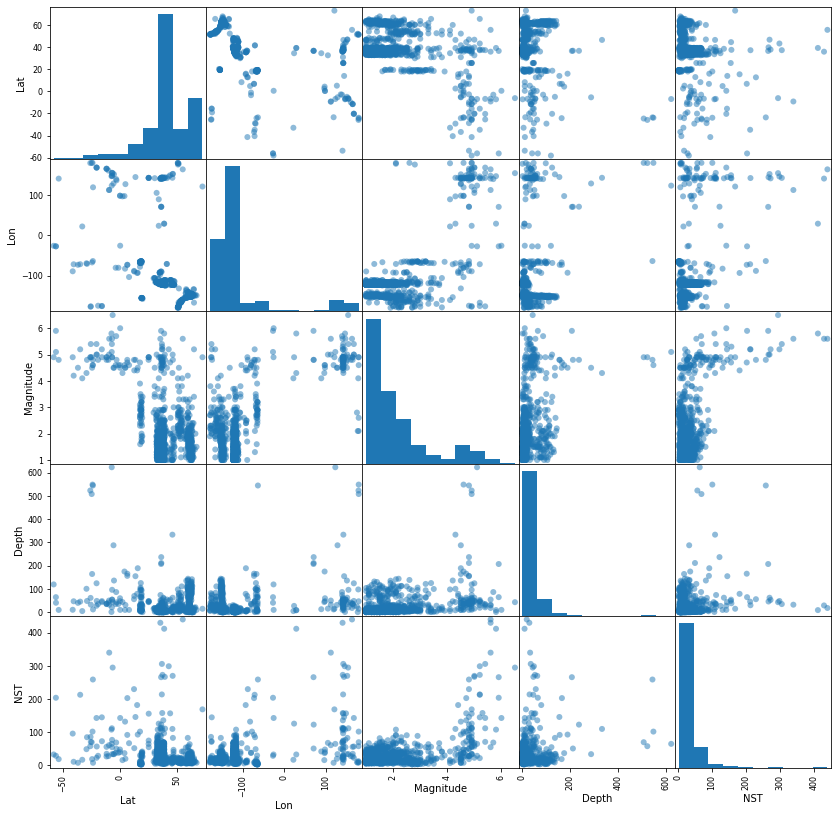

In [16]:
pd.plotting.scatter_matrix(eData, figsize=(14,14), marker='o');

4. Analyse von Untermengen
--------------------------

Zugriff auf die Variable 'Lat' (latitude):

In [17]:
eData['Lat']

0      33.9665
1      65.3689
2      58.1643
3      33.1555
4      36.7657
        ...   
906    32.6497
907    44.7355
908    18.3500
909    44.7340
910    67.6223
Name: Lat, Length: 911, dtype: float64

Welche Erdbeben fanden oberhalb einer geographischen Breite von 40 Grad statt?

In [18]:
eData['Lat'] > 40.0

0      False
1       True
2       True
3      False
4      False
       ...  
906    False
907     True
908    False
909     True
910     True
Name: Lat, Length: 911, dtype: bool

Gab es überhaupt Erdbeben oberhalb 50 Grad Breite?

In [19]:
(eData['Lat'] > 40.0).any()

True

Gab es also. Haben alle verzeichneten Erdbeben eine Breite größer als 18 Grad?

In [20]:
(eData['Lat'] > 18.0).all()

False

Es sind also auch Erdbeben unterhalb von 18 Grad verzeichnet.

Alle unterschiedlichen Werte der kategorischen Variable 'Version' mit Dataframe['Variablenname'].*unique()*

In [21]:
eData['Version'].unique()

array(['0', '2', '7', '1', '5', '8', '3', '6', '4', '9', 'B', 'C', 'A',
       'E', 'F', 'a', 'H'], dtype=object)

Häufigkeit der verschiedenen Kategorien in 'Version' mit Dataframe['Variablenname'].*value_counts()*:

In [22]:
eData['Version'].value_counts()

2    394
3    134
7    103
0     76
1     72
4     40
6     26
5     23
8     16
A     11
9      8
B      2
a      2
C      1
H      1
F      1
E      1
Name: Version, dtype: int64

Häufigkeit von Wertepaaren der beiden kategorischen Variablen 'Version' und 'Src' mit Pandas *crosstab()*:

In [23]:
pd.crosstab(eData['Src'], eData['Version'])

Version,0,1,2,3,4,5,6,7,8,9,A,B,C,E,F,H,a
Src,,,,,,,,,,,,,,,,,
ak,0,32,170,52,3,0,0,0,0,0,0,0,0,0,0,0,0
at,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ci,28,0,102,19,10,2,2,1,0,0,0,0,0,0,0,0,0
hv,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mb,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
nc,20,2,100,59,17,2,3,0,0,0,1,0,0,0,0,0,0
ne,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
nm,0,0,0,0,0,0,0,0,0,0,7,1,0,0,0,0,0
nn,0,0,0,0,0,0,0,78,0,0,0,0,0,0,0,0,0


Darstellung der Häufigkeitsverteilung der Erdbebenstärken für die verschiedenen Quellen mit einer Kastengraphik durch Pandas *boxplot()*:

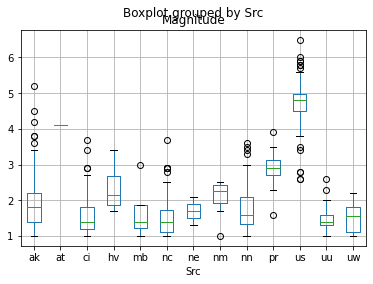

In [24]:
pd.DataFrame.boxplot(eData, column='Magnitude', by='Src');